In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 14.7 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import numpy as np
from glob import glob
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [17]:
data_dir = '/kaggle/input/arabic-sign-language-dataset-2022/datasets/train'
image_path = '/kaggle/input/arabic-sign-language-dataset-2022/datasets/train/images'
labels_path = '/kaggle/input/arabic-sign-language-dataset-2022/datasets/train/labels'

In [19]:
def read_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        labels = [line.strip().split() for line in lines]
    return labels

In [20]:
#dir for char mapping
classes = ['ain', 'al', 'aleff','bb','dal','dha','dhad','fa','gaaf','ghain',
           'ha','haa','jeem','kaaf','khaa','la','laam','meem','nun','ra',
           'saad','seen','sheen','ta','taa','thaa','thal','toot','waw',
           'ya','yaa','zay']

#create dir
mapping_dir = {}
for i in range(len(classes)):
               mapping_dir[i] = classes[i]

In [21]:
mapping_dir

{0: 'ain',
 1: 'al',
 2: 'aleff',
 3: 'bb',
 4: 'dal',
 5: 'dha',
 6: 'dhad',
 7: 'fa',
 8: 'gaaf',
 9: 'ghain',
 10: 'ha',
 11: 'haa',
 12: 'jeem',
 13: 'kaaf',
 14: 'khaa',
 15: 'la',
 16: 'laam',
 17: 'meem',
 18: 'nun',
 19: 'ra',
 20: 'saad',
 21: 'seen',
 22: 'sheen',
 23: 'ta',
 24: 'taa',
 25: 'thaa',
 26: 'thal',
 27: 'toot',
 28: 'waw',
 29: 'ya',
 30: 'yaa',
 31: 'zay'}

In [34]:
dir_english_arabic_mapping ={0:'ع',
 1: 'ال',
 2: 'أ',
 3: 'ب',
 4: 'د',
 5: 'ظ',
 6: 'َض',
 7: 'ف',
 8: 'ق',
 9: 'غ',
 10: 'ه',
 11: 'ح',
 12: 'ج',
 13: 'ك',
 14: 'خ',
 15: 'لا',
 16: 'ل',
 17: 'م',
 18: 'ن',
 19: 'ر',
 20: 'ص',
 21: 'س',
 22: 'ش',
 23: 'ت',
 24: 'ط',
 25: 'ث',
 26: 'ذ',
 27: 'ة',
 28: 'و',
 29: 'ي',
 30: 'ى',
 31: 'ز'}



In [38]:
def draw_boxes(image, labels):
    for label in labels:
        class_id = int(label[0])
        x, y, w, h = map(float, label[1:])
        image_height, image_width, _ = image.shape
        x1 = int((x - w / 2) * image_width)
        y1 = int((y - h / 2) * image_height)
        x2 = int((x + w / 2) * image_width)
        y2 = int((y + h / 2) * image_height)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0,0,0), 2)
    return image

In [ ]:
image_files = [file for file in os.listdir(image_path)]

random.shuffle(image_files)

In [24]:
len(image_files)

9955

In [25]:
labels_files = [file for file in os.listdir(labels_path)]

data = []

for i in labels_files:

    label_path = os.path.join(labels_path, i)
    label = read_labels(label_path)

    label = label[0][0]
    data.append(int(label))

Text(0, 0.5, 'Count')

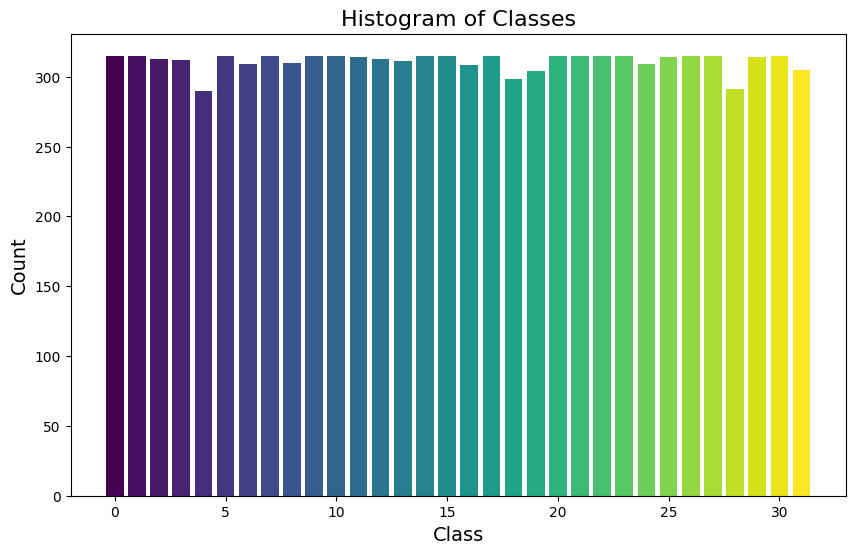

In [26]:
counts = np.bincount(data, minlength=32)
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(counts)), counts, color=plt.cm.viridis(np.linspace(0, 1, len(counts))))

plt.title('Histogram of Classes', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

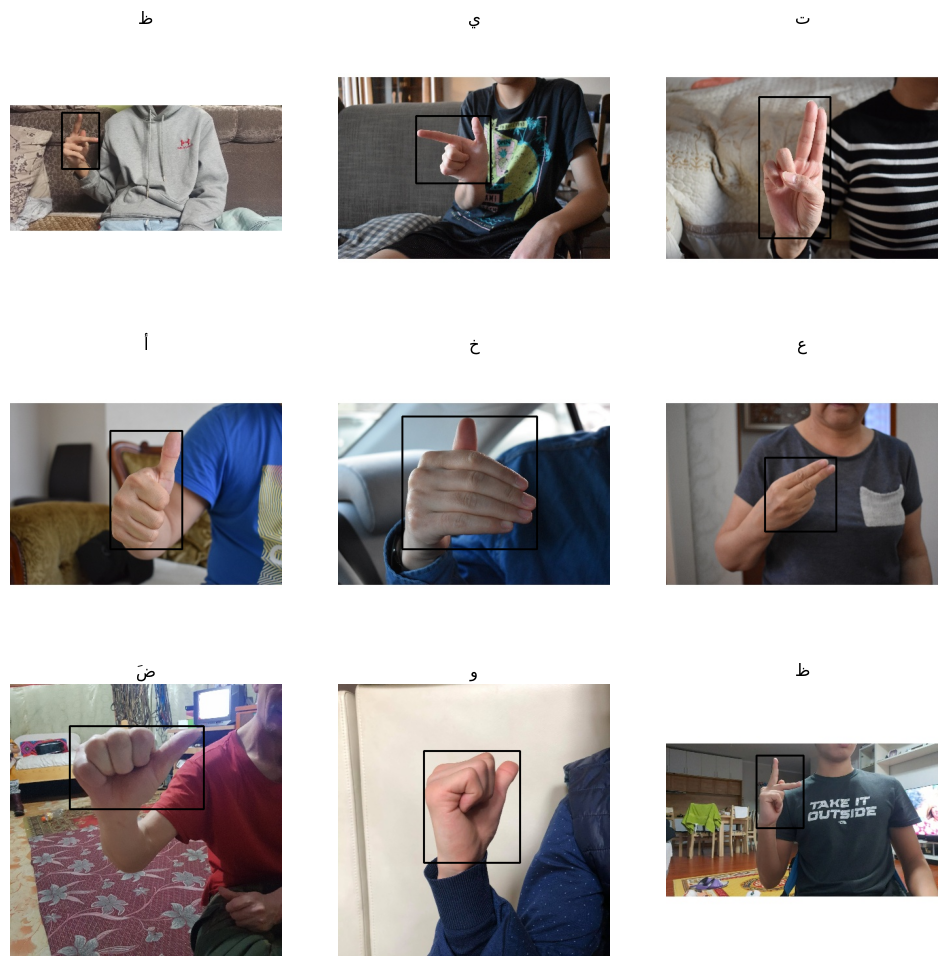

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for ax, image_file in zip(axes.ravel(), image_files[:9]):
    image_path = os.path.join(data_dir, 'images', image_file)
    label_path = os.path.join(data_dir, 'labels', os.path.splitext(image_file)[0] + '.txt')


    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    labels = read_labels(label_path)


    image_with_boxes = draw_boxes(image_rgb, labels)

    ax.imshow(image_with_boxes)
    ax.set_title(str(dir_english_arabic_mapping[int(labels[0][0])]))
    ax.axis('off')

plt.show()

In [12]:
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 71.4MB/s]


Transferred 319/391 items from pretrained weights


In [14]:
history = model.train(data='/kaggle/input/arabic-sign-language-dataset-2022/datasets/sign.yaml', epochs=50, imgsz=256,
                    patience = 50, batch = 128,
                    project ="ArSL", optimizer = 'Adam', momentum = 0.9,
                    cos_lr=True ,seed = 42, plots = True , close_mosaic = 0, lr0 = 0.001)

Ultralytics 8.3.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/arabic-sign-language-dataset-2022/datasets/sign.yaml, epochs=50, time=None, patience=50, batch=128, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=ArSL, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

2024-10-01 11:43:08,279	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-01 11:43:09,094	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/arabic-sign-language-dataset-2022/datasets/train/labels... 9955 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9955/9955 [00:30<00:00, 325.03it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/arabic-sign-language-dataset-2022/datasets/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/arabic-sign-language-dataset-2022/datasets/valid/labels... 4247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4247/4247 [00:05<00:00, 772.32it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/arabic-sign-language-dataset-2022/datasets/valid is not writeable, cache not saved.
Plotting labels to ArSL/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.001), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to ArSL/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.97G      1.119      3.864      1.146        189        256: 100%|██████████| 78/78 [00:46<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:17<00:00,  1.01s/it]


                   all       4247       4252     0.0317     0.0876     0.0189     0.0148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.96G      1.058       2.74      1.108        203        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]


                   all       4247       4252      0.248      0.435      0.276      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.95G      1.036      2.196      1.114        180        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.411      0.534       0.44      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.96G      1.002      1.902      1.105        170        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.394      0.526       0.44      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.95G     0.9598      1.698      1.093        203        256: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.569      0.652      0.648      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.95G     0.9193      1.568      1.076        167        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.657      0.675      0.712      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.95G     0.8998       1.47      1.072        196        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.717       0.73      0.788      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.95G      0.882      1.404      1.063        168        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.742      0.765      0.832      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.95G     0.8815      1.354      1.064        201        256: 100%|██████████| 78/78 [00:41<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]

                   all       4247       4252      0.754      0.759      0.839      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.95G     0.8566      1.311      1.057        183        256: 100%|██████████| 78/78 [00:41<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.809      0.818       0.89        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.95G     0.8422      1.255      1.047        178        256: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252       0.81      0.761       0.86      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.95G     0.8407      1.239      1.049        166        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.827      0.834      0.905       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.95G       0.83        1.2      1.046        198        256: 100%|██████████| 78/78 [00:41<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]

                   all       4247       4252      0.817      0.807      0.892       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.95G      0.821      1.174      1.038        191        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.845      0.823      0.904      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.95G     0.8161      1.147      1.037        176        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.839      0.823      0.906       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.95G      0.799      1.108      1.031        165        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.881      0.865      0.939      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.95G     0.7986      1.097      1.033        166        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252      0.868      0.859      0.932      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.95G     0.7871      1.066      1.029        186        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.897      0.857      0.936      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.95G     0.7797      1.065      1.023        179        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]

                   all       4247       4252      0.883      0.875      0.942      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.95G     0.7724      1.038      1.019        191        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.891      0.889      0.944      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.95G     0.7675      1.019      1.019        182        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.883      0.876      0.938      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.95G     0.7635          1      1.017        200        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.897      0.895      0.951      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.95G     0.7495     0.9907      1.017        189        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.887      0.872      0.943      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.95G     0.7527     0.9778      1.013        160        256: 100%|██████████| 78/78 [00:42<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252      0.889      0.904      0.954      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.95G     0.7452     0.9535      1.011        193        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.906      0.883      0.953      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.95G     0.7353     0.9296      1.009        182        256: 100%|██████████| 78/78 [00:41<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.928      0.904      0.964      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.95G      0.727     0.9236      1.006        188        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.922      0.901      0.961      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.95G     0.7296     0.9083      1.005        183        256: 100%|██████████| 78/78 [00:41<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.923      0.913      0.965      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.95G     0.7194     0.9068      1.001        171        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.915      0.914      0.965      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.95G     0.7153      0.896          1        195        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.933      0.914      0.967      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.95G     0.7089     0.8705     0.9958        179        256: 100%|██████████| 78/78 [00:41<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252      0.922      0.927       0.97      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.95G      0.704     0.8635     0.9953        171        256: 100%|██████████| 78/78 [00:41<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.927      0.928      0.968        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.95G     0.6986     0.8594     0.9911        181        256: 100%|██████████| 78/78 [00:41<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.06it/s]

                   all       4247       4252      0.928      0.923       0.97      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.95G     0.6906     0.8253     0.9882        202        256: 100%|██████████| 78/78 [00:41<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.934      0.931      0.972      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.95G     0.6879     0.8205     0.9859        170        256: 100%|██████████| 78/78 [00:42<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.06it/s]

                   all       4247       4252      0.936      0.935      0.972      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.95G     0.6698     0.8038     0.9811        180        256: 100%|██████████| 78/78 [00:41<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252       0.94      0.933      0.973      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.95G      0.682     0.8004     0.9877        184        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.04it/s]

                   all       4247       4252      0.949      0.929      0.973      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.95G     0.6778     0.7939     0.9836        189        256: 100%|██████████| 78/78 [00:42<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252      0.935      0.935      0.973      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.95G     0.6722     0.7931     0.9845        193        256: 100%|██████████| 78/78 [00:42<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]

                   all       4247       4252      0.939      0.939      0.976       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.95G     0.6675     0.7739     0.9776        185        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]

                   all       4247       4252      0.941      0.933      0.974      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.95G     0.6548     0.7667     0.9755        187        256: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]

                   all       4247       4252       0.94      0.937      0.974      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.95G     0.6547     0.7496     0.9751        182        256: 100%|██████████| 78/78 [00:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.08it/s]

                   all       4247       4252      0.933      0.945      0.974      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.95G     0.6544     0.7527     0.9721        213        256: 100%|██████████| 78/78 [00:40<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.09it/s]

                   all       4247       4252      0.944      0.934      0.973      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.95G     0.6433     0.7372     0.9742        190        256: 100%|██████████| 78/78 [00:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.08it/s]

                   all       4247       4252      0.939      0.944      0.975      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.95G     0.6497     0.7375     0.9711        171        256: 100%|██████████| 78/78 [00:41<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252      0.941      0.944      0.976      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.95G     0.6517     0.7527     0.9757        194        256: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]

                   all       4247       4252      0.942      0.944      0.976      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.95G     0.6458      0.734     0.9722        176        256: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]

                   all       4247       4252      0.938      0.949      0.977      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.95G     0.6383     0.7286     0.9703        171        256: 100%|██████████| 78/78 [00:42<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.02it/s]

                   all       4247       4252      0.945      0.943      0.977      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.95G     0.6398     0.7306      0.969        165        256: 100%|██████████| 78/78 [00:42<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]

                   all       4247       4252      0.946      0.943      0.977      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.95G     0.6395     0.7277     0.9702        193        256: 100%|██████████| 78/78 [00:42<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]

                   all       4247       4252      0.945      0.946      0.978      0.815



50 epochs completed in 0.826 hours.
Optimizer stripped from ArSL/train/weights/last.pt, 5.6MB
Optimizer stripped from ArSL/train/weights/best.pt, 5.6MB

Validating ArSL/train/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 186 layers, 2,690,608 parameters, 0 gradients, 6.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.14s/it]


                   all       4247       4252      0.938      0.948      0.977      0.815
                   ain        133        133      0.969      0.985      0.992      0.808
                    al        135        136      0.985      0.949      0.992      0.896
                 aleff        134        136      0.985      0.973      0.986      0.878
                    bb        135        137      0.985      0.932       0.99      0.893
                   dal        111        111      0.943      0.901      0.958      0.785
                   dha        135        135      0.984      0.922      0.982      0.832
                  dhad        130        130       0.93      0.969      0.985      0.838
                    fa        135        135      0.732      0.869       0.86      0.717
                  gaaf        134        134       0.84      0.821      0.897      0.736
                 ghain        135        135      0.989      0.985      0.995      0.844
                    h

In [11]:
results = model.val(data = '/kaggle/input/arabic-sign-language-dataset-2022/datasets/sign.yaml' , save_dir = '/kaggle/working/' , plots = True)

Ultralytics 8.3.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/input/arabic-sign-language-dataset-2022/datasets/valid/labels... 4247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4247/4247 [00:04<00:00, 985.42it/s] 


val: WARNING ⚠️ Cache directory /kaggle/input/arabic-sign-language-dataset-2022/datasets/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:21<00:00, 12.24it/s]


                   all       4247       4252      0.962      0.946      0.982      0.819
                   ain        133        133      0.992       0.97      0.994      0.834
                    al        135        136      0.985       0.96      0.992       0.91
                 aleff        134        136      0.995      0.963      0.994      0.886
                    bb        135        137      0.984      0.985      0.994      0.893
                   dal        111        111      0.969      0.851      0.966      0.789
                   dha        135        135      0.978      0.941      0.978      0.829
                  dhad        130        130      0.958      0.969       0.98       0.83
                    fa        135        135      0.886      0.874      0.927      0.762
                  gaaf        134        134      0.909      0.791      0.937      0.777
                 ghain        135        135          1      0.985      0.995       0.85
                    h

In [27]:
test_images_dir = '/kaggle/input/arabic-sign-language-dataset-2022/datasets/valid/images'
test_images = [os.path.join(test_images_dir, image) for image in os.listdir(test_images_dir)]

test_samples = np.random.choice(test_images, 9, replace=False)


In [42]:
def draw_boxes_prediction(image, results):
    for result in results:
        boxes = result.boxes
        for box in boxes:

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            class_id = mapping_dir[int(box.cls[0])]
            confidence = box.conf[0]
            label = f'letter {class_id} ({confidence:.2f})'


            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 255), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    return image


0: 256x256 1 al, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 toot, 10.2ms
Speed: 1.4ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 ha, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 ghain, 9.4ms
Speed: 1.3ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 ya, 9.7ms
Speed: 1.4ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 meem, 9.9ms
Speed: 1.4ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 dhad, 8.0ms
Speed: 1.1ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 jeem, 8.3ms
Speed: 1.1ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 saad, 8.2ms
S

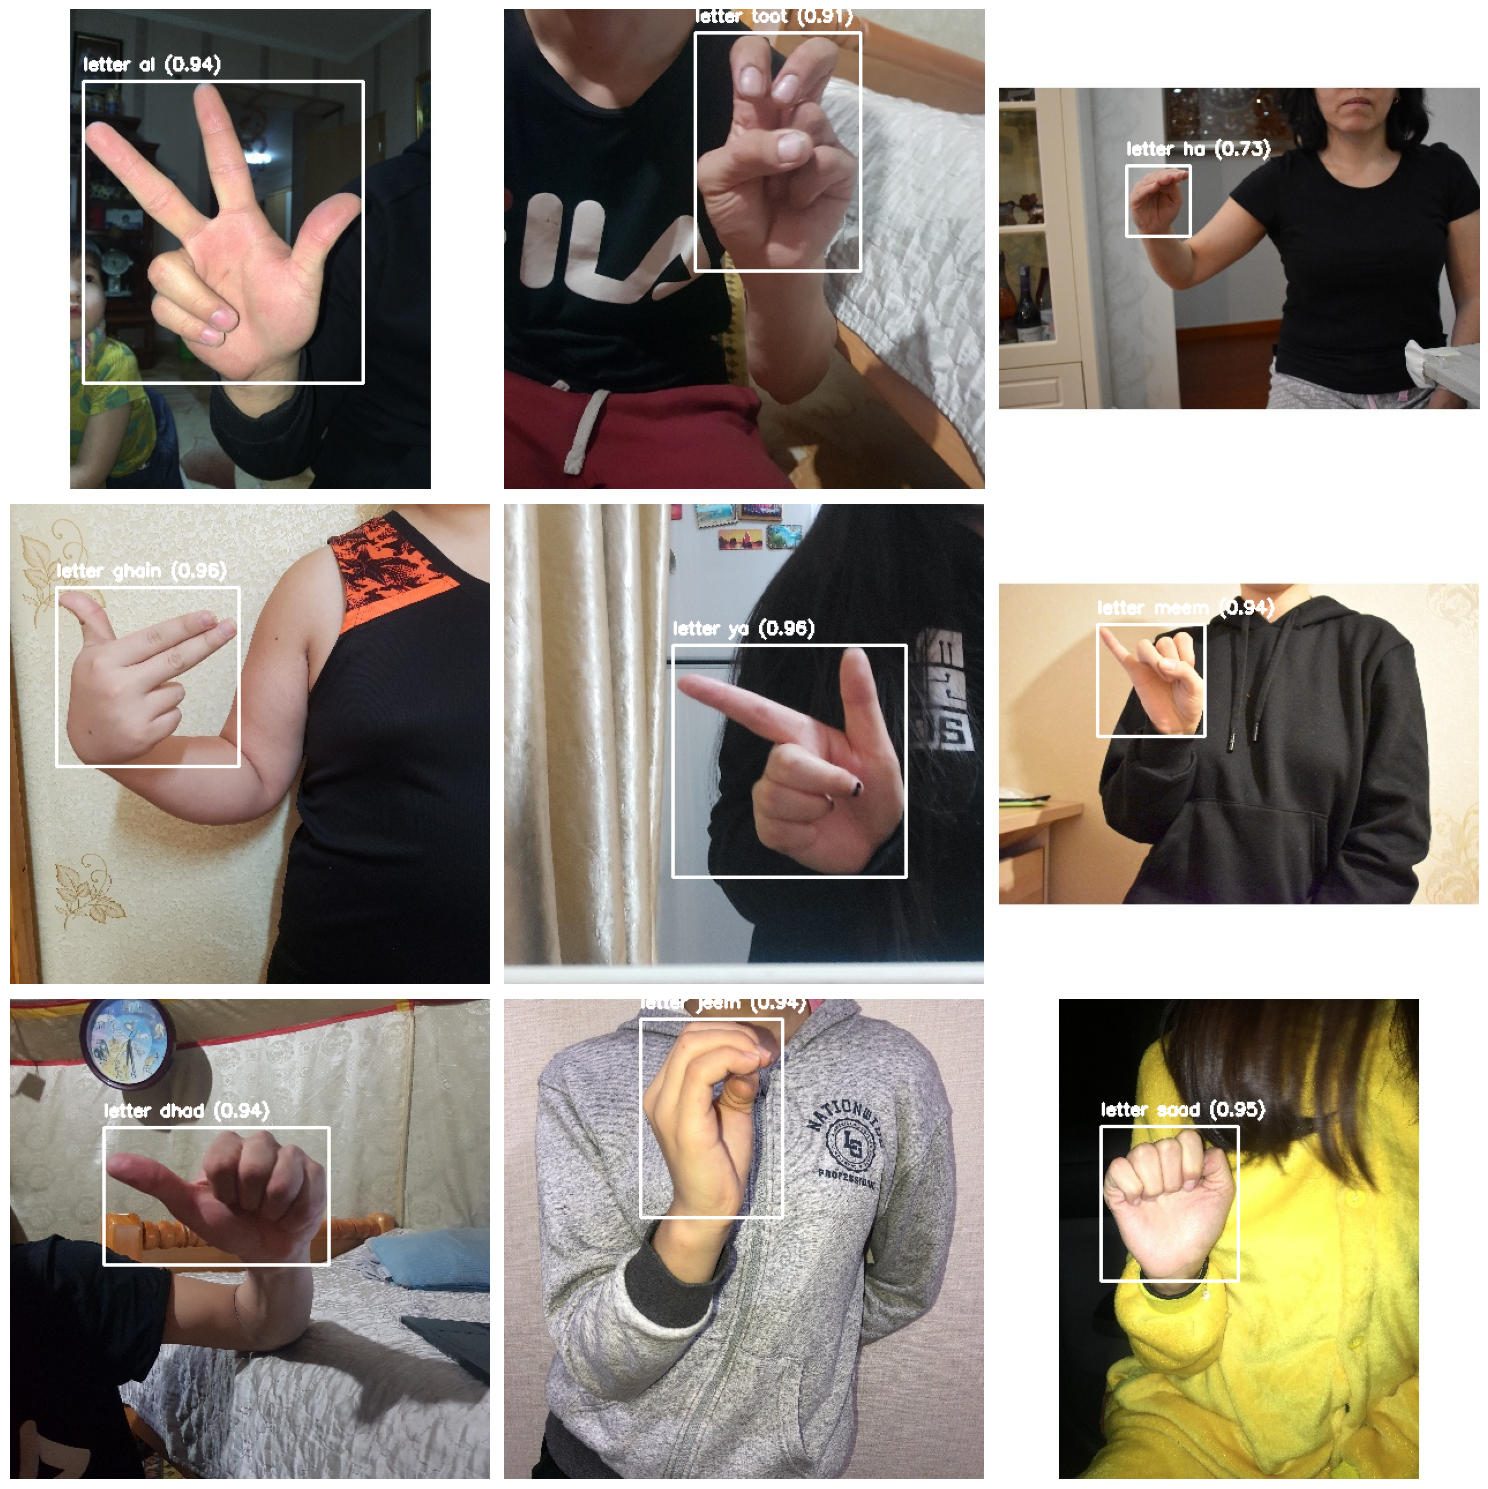

In [43]:
cols = 3
rows = (len(test_samples) + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for i, path in enumerate(test_samples):

    image = cv2.imread(path)

    results = model(image)

    annotated_image = draw_boxes_prediction(image, results)

    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(annotated_image_rgb)
    plt.axis('off')



plt.tight_layout()
plt.show()

![ALT_TEXT_FOR_SCREEN_READERS](confusion_matrix_normalized.png)

![ALT_TEXT_FOR_SCREEN_READERS](PR_curve.png)